In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
plt.style.use('ggplot')

In [102]:
pbs = pd.read_csv('fpppy_data/data/pbs.csv').drop(['Unnamed: 0'], axis=1)
pbs['Month'] = pd.to_datetime(pbs['Month'].str[:4+1+3], format='%Y %b')
pbs = pbs.sort_values(by=['Month'])

In [103]:
def ts_mean(df, ts, y):
    return df.groupby(ts)[y].mean()

def ts_sd(df, ts, y):
    return df.groupby(ts)[y].std()

In [113]:
max_mean_ts = None
max_mean_col = None
max_mean = 0
min_std_ts = None
min_std_col = None
min_std = float('inf')
for col in ['Concession', 'Type', 'ATC1', 'ATC1_desc', 'ATC2', 'ATC2_desc']:
    if ts_mean(pbs, col, 'Cost').max() > max_mean:
        max_mean = ts_mean(pbs, col, 'Cost').max()
        max_mean_ts = ts_mean(pbs, col, 'Cost').idxmax()
        max_mean_col = col
    if ts_sd(pbs, col, 'Cost').std() < min_std:
        min_std = ts_mean(pbs, col, 'Cost').std()
        min_std_ts = ts_mean(pbs, col, 'Cost').idxmin()
        min_std_col = col

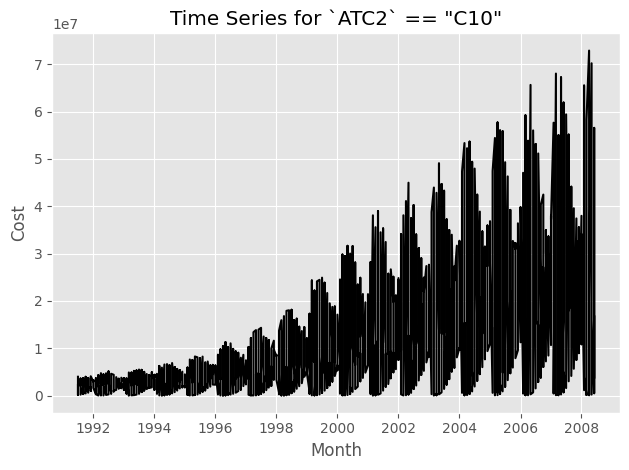

In [114]:
fig = plt.figure()
ax = fig.gca()

ax.plot(pbs.query(f'`{max_mean_col}` == "{max_mean_ts}"')['Month'], pbs.query(f'`{max_mean_col}` == "{max_mean_ts}"')['Cost'], c='k')
ax.set_xlabel('Month')
ax.set_ylabel('Cost')
ax.set_title(f'Time Series for `{max_mean_col}` == "{max_mean_ts}"')

plt.tight_layout()
plt.show()

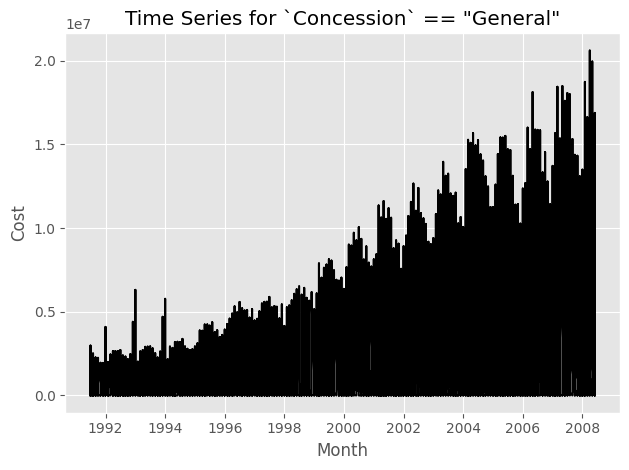

In [115]:
fig = plt.figure()
ax = fig.gca()

ax.plot(pbs.query(f'`{min_std_col}` == "{min_std_ts}"')['Month'], pbs.query(f'`{min_std_col}` == "{min_std_ts}"')['Cost'], c='k')
ax.set_xlabel('Month')
ax.set_ylabel('Cost')
ax.set_title(f'Time Series for `{min_std_col}` == "{min_std_ts}"')

plt.tight_layout()
plt.show()